In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2010.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0       cara mudah membangun jaringan komputer internet
1                              jaringan komputer tcp ip
2     parallel programming teknik aplikasi jaringan ...
3                      tip jitu optimasi jaringan wi fi
4     pengembangan media pembelajaran teknologi info...
5     autentikasi kendali akses audit sistem keamana...
6                          cisco ccna jaringan komputer
7     koneksi jaringan antar sekolah teknologi wireless
8     analisis tingkat penggunaan internet dikalanga...
9     implementasi intrusion detection system ids sn...
10    rancang bangun analisa qos audio video streami...
11          analisa qos jaringan mpls ipv6 routing ospf
12    monitoring sistem kerja pengembangan jaringan ...
13    langsung praktik mengelola jaringan lebih efek...
14    studi implementasi voip sip jaringan kampus un...
15      cara mudah membangun jaringan komputer internet
16                  desain standar perpustakaan 

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

4911
[['cara', 'mudah', 'membangun', 'jaringan', 'komputer', 'internet']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['cara', 'mudah', 'membangun', 'jaringan', 'komputer', 'internet', 'cara_mudah', 'membangun_jaringan', 'cara_mudah', 'membangun_jaringan', 'cara_mudah', 'membangun_jaringan'], ['jaringan', 'komputer', 'tcp', 'ip', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['parallel', 'programming', 'teknik', 'aplikasi', 'jaringan', 'workstation', 'komputer', 'paralel'], ['tip', 'jitu', 'optimasi', 'jaringan', 'wi', 'fi'], ['pengembangan', 'media', 'pembelajaran', 'teknologi', 'informasi', 'media_pembelajaran', 'teknologi_informasi', 'media_pembelajaran', 'teknologi_informasi', 'media_pembelajaran', 'teknologi_informasi'], ['autentikasi', 'kendali', 'akses', 'audit', 'sistem', 'keamanan', 'jaringan', 'komputer', 'jaringan_komputer', 'sistem_keamanan', 'jaringan_komputer', 'jaringan_komputer'], ['cisco', 'ccna', 'jaringan', 'komputer', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['koneksi', 'jaringan', 'antar', 'sekolah', 'teknologi', 'wireless'], ['analisis', 

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                0             1             2              3   \
0             cara         mudah     membangun       jaringan   
1         jaringan      komputer           tcp             ip   
2         parallel   programming        teknik       aplikasi   
3              tip          jitu      optimasi       jaringan   
4     pengembangan         media  pembelajaran      teknologi   
5      autentikasi       kendali         akses          audit   
6            cisco          ccna      jaringan       komputer   
7          koneksi      jaringan         antar        sekolah   
8         analisis       tingkat    penggunaan       internet   
9     implementasi     intrusion     detection         system   
10         rancang        bangun       analisa            qos   
11         analisa           qos      jaringan           mpls   
12      monitoring        sistem         kerja   pengembangan   
13        langsung       praktik     mengelola       jaringan   
14           studi  imple

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(7977 unique tokens: ['cara', 'cara_mudah', 'internet', 'jaringan', 'komputer']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

4911


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.38045848
Num Topics = 4  has Coherence Value of 0.4021779938
Num Topics = 6  has Coherence Value of 0.4453480274
Num Topics = 8  has Coherence Value of 0.494962478
Num Topics = 10  has Coherence Value of 0.5227859604
Num Topics = 12  has Coherence Value of 0.5100114031
Num Topics = 14  has Coherence Value of 0.5205330873
Num Topics = 16  has Coherence Value of 0.5592981226
Num Topics = 18  has Coherence Value of 0.5331236419


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)
pprint(model.print_topics())

[(0,
  '0.010*"sistem_informasi" + 0.010*"matematika" + 0.009*"prestasi_belajar" + '
  '0.009*"pembuatan_cd" + 0.009*"load_balancing" + 0.007*"kelas_vii" + '
  '0.007*"interaktif" + 0.007*"studi_kasus" + 0.007*"implementasi_algoritma" + '
  '0.007*"pembelajaran_matematika"'),
 (1,
  '0.008*"motivasi_belajar" + 0.007*"pengolahan_data" + 0.005*"xml" + '
  '0.005*"browser" + 0.004*"penerima_beasiswa" + 0.004*"bilangan" + '
  '0.004*"sarana" + 0.004*"sistem_pendukung" + 0.004*"sistem_pakar" + '
  '0.004*"dokumen"'),
 (2,
  '0.011*"flash" + 0.010*"keputusan_pemilihan" + 0.010*"sistem_pendukung" + '
  '0.009*"perguruan_tinggi" + 0.007*"problem_learning" + 0.006*"linier" + '
  '0.006*"seleksi_penerimaan" + 0.006*"sistem_informasi" + '
  '0.005*"pengiriman_barang" + 0.005*"pemilihan"'),
 (3,
  '0.012*"sistem_informasi" + 0.009*"rancang_bangun" + 0.008*"studi_kasus" + '
  '0.007*"smart" + 0.006*"pembuatan_website" + 0.005*"pengendalian_persediaan" '
  '+ 0.005*"teknik_informatika" + 0.005*"info

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"diagnosa_penyakit" + 0.009*"tugas_akhir" + 0.009*"program_studi" + 0.009*"sistem_informasi" + 0.008*"game" + 0.007*"sistem_pakar" + 0.006*"membangun" + 0.005*"kinerja_manajerial" + 0.005*"diagnosa" + 0.005*"sejati"
Topic: 1 Word: 0.019*"sistem_informasi" + 0.014*"perangkat_lunak" + 0.010*"sms_gateway" + 0.008*"analisis_perancangan" + 0.007*"prestasi_belajar" + 0.006*"informasi" + 0.006*"rancang_bangun" + 0.006*"local_area" + 0.006*"penerimaan_siswa" + 0.006*"perancangan"
Topic: 2 Word: 0.010*"pembuatan_cd" + 0.009*"pembuatan_website" + 0.007*"cd" + 0.006*"kinerja_karyawan" + 0.006*"mata_kuliah" + 0.005*"interaktif" + 0.005*"lalu_lintas" + 0.005*"sistem_informasi" + 0.005*"publik" + 0.005*"port"
Topic: 3 Word: 0.015*"sistem_informasi" + 0.011*"studi_kasus" + 0.008*"internet_protocol" + 0.008*"rancang_bangun" + 0.006*"informasi" + 0.004*"sistem" + 0.004*"content_management" + 0.004*"adisucipto_yogyakarta" + 0.004*"pekanbaru" + 0.004*"industri"
Topic: 4 Word: 0.013*"

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,14.0,0.9279,"sistem_informasi, studi_kasus, sms_gateway, te...","[cara, mudah, membangun, jaringan, komputer, i..."
1,1,11.0,0.5849,"studi_kasus, rancang_bangun, sistem_informasi,...","[jaringan, komputer, tcp, ip, jaringan_kompute..."
2,2,11.0,0.6691,"studi_kasus, rancang_bangun, sistem_informasi,...","[parallel, programming, teknik, aplikasi, jari..."
3,3,12.0,0.4101,"matematika, kelas_vii, model_pembelajaran, per...","[tip, jitu, optimasi, jaringan, wi, fi]"
4,4,13.0,0.7435,"hasil_belajar, media_pembelajaran, pokok_bahas...","[pengembangan, media, pembelajaran, teknologi,..."
5,5,11.0,0.3980,"studi_kasus, rancang_bangun, sistem_informasi,...","[autentikasi, kendali, akses, audit, sistem, k..."
6,6,11.0,0.8828,"studi_kasus, rancang_bangun, sistem_informasi,...","[cisco, ccna, jaringan, komputer, jaringan_kom..."
7,7,10.0,0.4470,"rumah_sakit, sistem_pendukung, sistem_informas...","[koneksi, jaringan, antar, sekolah, teknologi,..."
8,8,11.0,0.4919,"studi_kasus, rancang_bangun, sistem_informasi,...","[analisis, tingkat, penggunaan, internet, dika..."
9,9,11.0,0.9033,"studi_kasus, rancang_bangun, sistem_informasi,...","[implementasi, intrusion, detection, system, i..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

11.0    484
1.0     475
14.0    451
5.0     424
15.0    357
6.0     317
3.0     289
8.0     285
13.0    265
10.0    258
9.0     248
12.0    247
0.0     214
4.0     204
2.0     198
7.0     195
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

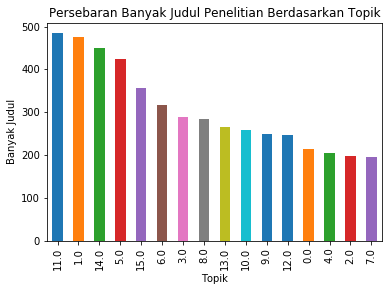

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9574,"diagnosa_penyakit, tugas_akhir, program_studi, sistem_informasi, game, sistem_pakar, membangun, ...","[sistem, informasi, pengelolaan, data, skripsi, program, studi, sistem, informasi, universitas, ..."
1,1.0,0.9716,"sistem_informasi, perangkat_lunak, sms_gateway, analisis_perancangan, prestasi_belajar, informas...","[perangkat, lunak, bantu, pengolahan, data, penjualan, barang, client, server, integrasi, barcod..."
2,2.0,0.9414,"pembuatan_cd, pembuatan_website, cd, kinerja_karyawan, mata_kuliah, interaktif, lalu_lintas, sis...","[mobilitas, tinggi, pengguna, internet, pengguna, hotspot, menjadi, tuntutan, walaupun, umum, te..."
3,3.0,0.9625,"sistem_informasi, studi_kasus, internet_protocol, rancang_bangun, informasi, sistem, content_man...","[implementasi, frame, relay, voice, over, frame, relay, vofr, perangkat, frad, act, sdm, citra, ..."
4,4.0,0.9747,"flash, analisis_perancangan, smart, sistem_informasi, studi_kasus, smart_card, analisis, algorit...","[aplikasi, smart, card, electronic, medical, record, emr, smart, card, application, electronic, ..."
5,5.0,0.9677,"rancang_bangun, sistem_pakar, load_balancing, proxy_server, sistem_pendukung, anak, server, sist...","[aplikasi, ujian, madrasah, lokal, area, network, lan, studi, kasus, mata, pelajaran, tik, madra..."
6,6.0,0.9653,"rekayasa_perangkat, studi_kasus, sistem_informasi, implementasi_algoritma, sistem_pendukung, kot...","[rekayasa, perangkat, lunak, pengambilan, keputusan, penerimaan, dosen, yayasan, pendidikan, dip..."
7,7.0,0.9531,"siswa_kelas, linier, sistem_informasi, motivasi_belajar, analisis_faktor, faktor, pembelajaran_k...","[sistem, informasi, manajemen, sumber, daya, manusia, institut, sains, teknologi, jayapura, sist..."
8,8.0,0.9592,"sistem_informasi, keputusan_pemilihan, sistem_pendukung, perguruan_tinggi, siswa_kelas, real_tim...","[membangun, firewall, jaringan, komputer, windows, server, smk, negeri, watulimo, kabupaten, tre..."
9,9.0,0.9653,"e_commerce, bahan_ajar, analisa_perancangan, basis_data, online, toko_buku, commerce, aplikasi, ...","[aplikasi, data, mining, menampilkan, informasi, tingkat, kelulusan, mahasiswa, studi, kasus, fa..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2010.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.055147 -0.055853       1        1  8.442469
5     -0.046867 -0.045307       2        1  7.586251
1      0.012560 -0.121938       3        1  7.532159
15     0.065790 -0.089550       4        1  7.229875
14    -0.062683 -0.042936       5        1  7.018791
6     -0.055000  0.023675       6        1  6.572150
8     -0.010843  0.059296       7        1  6.271698
13     0.112043  0.006474       8        1  5.996114
12     0.124658  0.029285       9        1  5.918041
3     -0.038239 -0.005930      10        1  5.829681
10    -0.041476  0.058329      11        1  5.678172
0     -0.034503 -0.003017      12        1  5.430015
9      0.016189  0.048140      13        1  5.295683
4     -0.030311  0.018701      14        1  5.159542
7      0.072846  0.024282      15        1  5.092744
2     -0.029017  0.096349      16        1  4.946614, topic_info=   

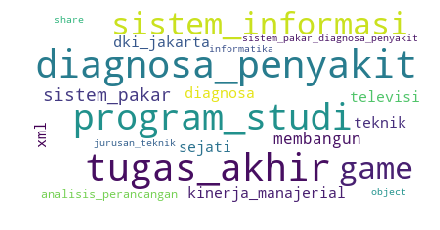

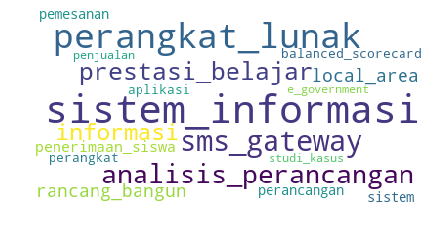

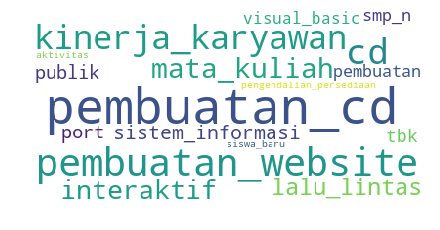

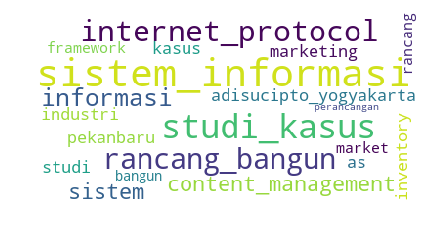

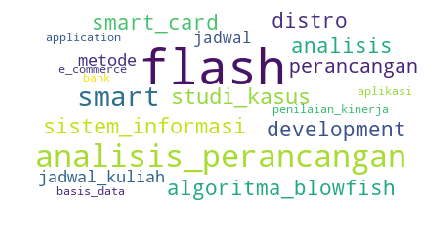

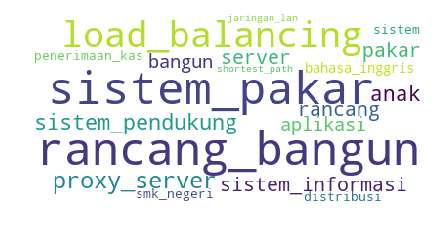

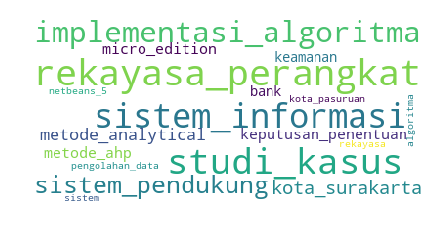

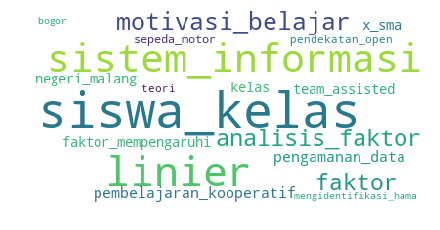

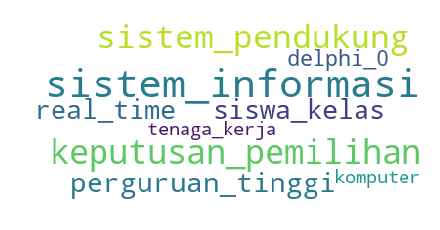

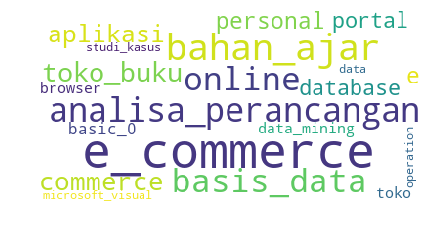

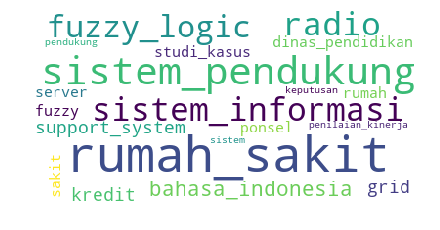

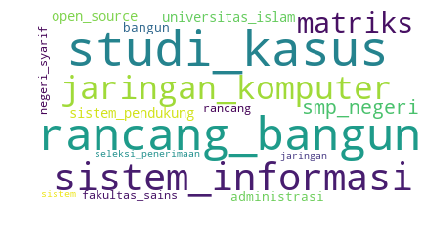

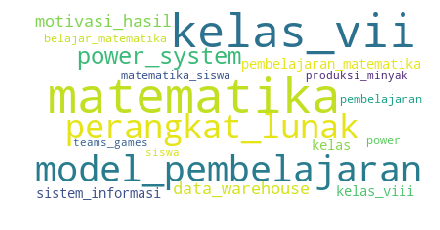

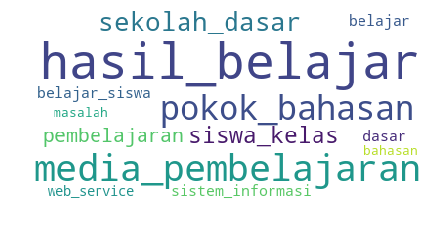

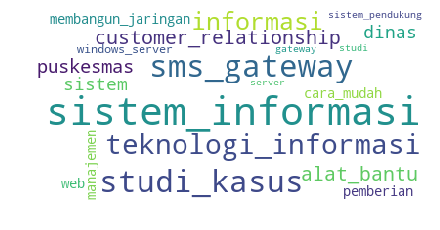

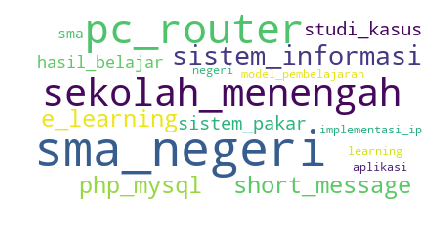

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2010.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')